# Widget Woes

Update: this might be working now:

<IPython.core.display.Javascript object>


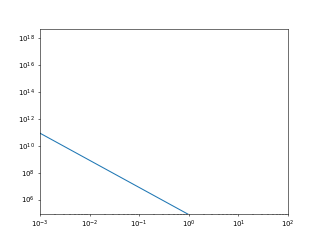

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTg4LjAsIGRlc2NyaXB0aW9uPXUnYWxwaGEnLCBtYXg9MjY0LjAsIG1pbj0tODguMCksIEZsb2F0U2xpZGVyKHZhbHVlPTfigKY=


In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import *

import numpy as np
import pandas as pd

from rowe_model_opt2 import Rowe2004Model as Rowe2004Model_2



#mod = Rowe2004Model_2(freqs=freqs)
#EEG = mod.compute_vector_P_EEG()
#freqs = np.linspace(0.001,100,num=50)
#df_EEG = pd.DataFrame(np.squeeze(EEG))
#df_EEG.abs().plot(logx=True,logy=True)

class anewfig2(object):

    def plot_widget(self):
        
        freqs = np.linspace(0.001,100, num=50)

        mod = Rowe2004Model_2(freqs=freqs)
        x = mod.compute_vector_P_EEG()
        
        phi_n = mod.phi_n
        
        #x = np.linspace(0, 2 * np.pi)
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        line, = ax.plot(freqs,x) #x, np.sin(x))

        ax.set_xlim([0,100])
        #ax.set_ylim([0.00001,100.])
        ax.semilogx()
        ax.semilogy()

        def update_widget(alpha=88.0, gamma=71.8, t_0=79.2, 
                          G_ee=3.8, G_ei=-8.0, G_ese=10.8,
                          G_esre=-5.7, G_srs=-0.34, p_0=2.94, r_e=80.0):
            
            mod = Rowe2004Model_2(freqs=freqs)
            
            mod.alpha
            #phi_n=phi_n,
            mod.alpha=alpha
            mod.gamma=gamma
            mod.t_0=t_0
            mod.G_ee=G_ee
            mod.G_ei=G_ei
            mod.G_ese=G_ese
            mod.G_esre=G_esre
            mod.G_srs=G_srs
            mod.p_0=p_0
            mod.r_e=r_e
                
            mod.phi_n = phi_n
            
            #x = mod.compute_P_EEG() #mod.freqs)
            x = mod.compute_vector_P_EEG()

            
            
            line.set_ydata(x)# np.sin(w * x))
            fig.canvas.draw()
            

            #ax.set_xlim([10E-1,10E1]) # 0,100])
            
            ax.set_xlim([0,100])
            #ax.set_ylim([0.00001,10E10])# 1000.])
            ax.semilogx()
            ax.semilogy()

            

        interact(update_widget)
            

anf2 = anewfig2()

anf2.plot_widget()

---

Having trouble getting widgets to work. This is the status:

This toy example works:

In [9]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

"""
x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw()

interact(update);
""";


class afig(object):

    def plot_widget(self):

        x = np.linspace(0, 2 * np.pi)
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        line, = ax.plot(x, np.sin(x))


        def update_widget(w = 1.0):
            line.set_ydata(np.sin(w * x))
            fig.canvas.draw()


        interact(update_widget);
            

In [5]:
blah = afig()

<IPython.core.display.Javascript object>


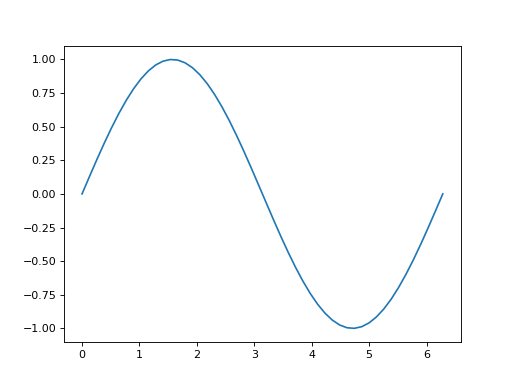

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgZGVzY3JpcHRpb249dSd3JywgbWF4PTMuMCwgbWluPS0xLjApLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSfigKY=


In [6]:
blah.plot_widget()

I added something like this in `rowe_model_opt.py`:

In [10]:
from rowe_model_opt import Rowe2004Model

In [11]:
mod = Rowe2004Model(freqs = np.linspace(0.001,100, num=50))

<IPython.core.display.Javascript object>


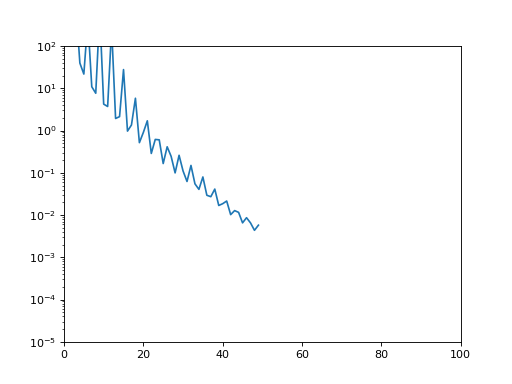

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTg4LjAsIGRlc2NyaXB0aW9uPXUnYWxwaGEnLCBtYXg9MjY0LjAsIG1pbj0tODguMCksIEZsb2F0U2xpZGVyKHZhbHVlPTfigKY=


In [12]:
mod.plot_widget()

...this doesn't seem to do the updates properly. Although I'm not sure.

This is an alternative version that mirrors directly the toy example; not trying to do it directly inside the class

In [ ]:
class anewfig(object):

    def plot_widget(self):
        
        freqs = np.linspace(0.001,100, num=50)
        mod = Rowe2004Model(freqs=freqs)        
        phi_n = mod.phi_n
        x = mod.compute_P_EEG(mod.freqs)

        #x = np.linspace(0, 2 * np.pi)
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        line, = ax.plot(freqs,x) #x, np.sin(x))

        #ax.set_xlim([0,100])
        #ax.set_ylim([0.00001,100.])
        #ax.semilogx()
        #ax.semilogy()

        def update_widget(alpha=88.0, gamma=71.8, t_0=79.2, 
                          G_ee=3.8, G_ei=-8.0, G_ese=10.8,
                          G_esre=-5.7, G_srs=-0.34, p_0=2.94, r_e=80.0):
            
            mod = Rowe2004Model(freqs=freqs,phi_n=phi_n,
                                alpha=alpha,gamma=gamma,t_0=t_0,
                                G_ee=G_ee,G_ei=G_ei,G_ese=G_ese,G_esre=G_esre,
                                G_srs=G_srs,p_0=p_0,r_e=r_e)
                                
            
            x = mod.compute_P_EEG(mod.freqs)
            
            line.set_ydata(x)# np.sin(w * x))
            fig.canvas.draw()
            

            #ax.set_xlim([0,100])
            #ax.set_ylim([0.00001,100.])
            #ax.semilogx()
            #ax.semilogy()

            

        interact(update_widget)
            

<IPython.core.display.Javascript object>


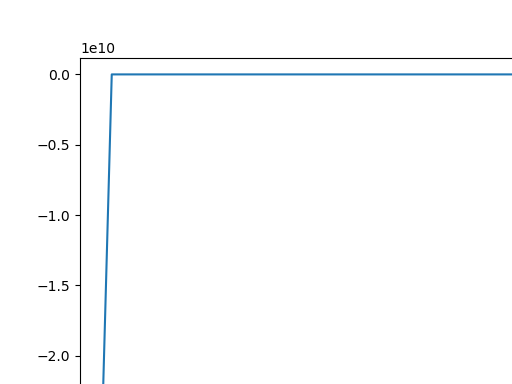

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTg4LjAsIGRlc2NyaXB0aW9uPXUnYWxwaGEnLCBtYXg9MjY0LjAsIG1pbj0tODguMCksIEZsb2F0U2xpZGVyKHZhbHVlPTfigKY=


In [14]:
anf = anewfig()

anf.plot_widget()

...but this also doesn't seem to be working. 


---